# Pandas

Basically, R dataframes in python or excell in python; natural extension of numpy (it builds up on numpy arrays).

Overview:

1. Series
2. Data Frames
    - 2.1 Basics: Creation, Structure, Access, Modification
    - 2.2 Conditional Selection
    - 2.3 Multi-Index and Index Hierarchy
    - 2.4 Missing Data
    - 2.5 Groupby
    - 2.6 Merging, Joining, Concatenating
    - 2.7 Useful Operations
    - 2.8 Data I/O
3. Visualization

## 1. Series

Series are like extended dictionaries.

In [5]:
import numpy as np
import pandas as pd

In [10]:
# Some collections: list with strings/chars, numpy array, dictionary
labels = ['a','b','c']
my_data = [10,20,30]
arr = np.array([10,20,30])
d = {'a':10,'b':20,'c':30}

In [13]:
# We create a Series with a collection: list, ndarray, dictionary
pd.Series(data = my_data)

0    10
1    20
2    30
dtype: int64

In [15]:
# We can specify the indices we'd like to use
# We can access data-points with these indices
pd.Series(data = my_data, index = labels)

a    10
b    20
c    30
dtype: int64

In [16]:
pd.Series(arr)

0    10
1    20
2    30
dtype: int64

In [17]:
# If we pass a dictionary, the indices are the keys
pd.Series(d)

a    10
b    20
c    30
dtype: int64

In [18]:
# A Series can contain any kind of objects
# Even functions!
pd.Series([sum, print, len])

0      <built-in function sum>
1    <built-in function print>
2      <built-in function len>
dtype: object

In [28]:
# We can pass data & indices without param name in order
ser1 = pd.Series([1,2,3,4],['USA', 'Germany','USSR', 'Japan'])

In [29]:
ser1

USA        1
Germany    2
USSR       3
Japan      4
dtype: int64

In [30]:
ser2 = pd.Series([1,2,5,4],['USA', 'Germany','Italy', 'Japan'])

In [31]:
ser2

USA        1
Germany    2
Italy      5
Japan      4
dtype: int64

In [34]:
# IMPORTANT: We should use the indices/keys to access the data much faster
ser1['USA']

1

In [38]:
# If the index we pass is an integer, then so be it
ser3 = pd.Series(['USA', 'Germany','Italy', 'Japan'],[1,2,5,4])

In [39]:
ser3[1]

'USA'

In [42]:
# We can perform operations with series
# Matching indices are found and operations done with the data in them
# If a matching index is nont found -> NaN
# NOTE: integers are converted to float; this also happens with numpy
ser1 + ser2

Germany    4.0
Italy      NaN
Japan      8.0
USA        2.0
USSR       NaN
dtype: float64

## 2. Data Frames

Data frames are like tables. Each column and each row are a Series; all Series have the same indices!

### 2.1 Basics: Creation, Structure, Access, Modification

In [46]:
import numpy as np
import pandas as pd
from numpy.random import randn

In [47]:
# We manually set a seed to have the same random numbers
np.random.seed(101)

In [53]:
# A data frame has the data, and optionally (row-)indices & column-indices
df = pd.DataFrame(randn(5,4),['A','B','C','D','E'],['W','X','Y','Z'])

In [54]:
df

,W,X,Y,Z
A,0.386030,2.084019,-0.376519,0.230336
B,0.681209,1.035125,-0.031160,1.939932
C,-1.005187,-0.741790,0.187125,-0.732845
D,-1.382920,1.482495,0.961458,-2.141212
E,0.992573,1.192241,-1.046780,1.292765


In [56]:
# Extract a column Series: just use the column index
df['W']

A    0.386030
B    0.681209
C   -1.005187
D   -1.382920
E    0.992573
Name: W, dtype: float64

In [58]:
# We can all also access the column with dot+col-name
# But maybe better avoid that
df.W

A    0.386030
B    0.681209
C   -1.005187
D   -1.382920
E    0.992573
Name: W, dtype: float64

In [60]:
# If we want several columns, pass a list of col-indices
df[['W','Z']]

,W,Z
A,0.386030,0.230336
B,0.681209,1.939932
C,-1.005187,-0.732845
D,-1.382920,-2.141212
E,0.992573,1.292765


In [68]:
# Create new columns: just assign values,
# eg, as linear combinations of existing columns
df['new'] = df['W'] + df['Z']

In [69]:
df

,W,X,Y,Z,new
A,0.386030,2.084019,-0.376519,0.230336,0.616367
B,0.681209,1.035125,-0.031160,1.939932,2.621142
C,-1.005187,-0.741790,0.187125,-0.732845,-1.738032
D,-1.382920,1.482495,0.961458,-2.141212,-3.524132
E,0.992573,1.192241,-1.046780,1.292765,2.285338


In [70]:
# To remove a row (axis=0) or a column (axis=1)
# drop doesn't happen in-place by default, instead, a new DataFrame is returned
# Many pandas methods don't occur in-place unless we pass the argument inplace=True
df.drop('new',axis=1,inplace=True)

In [71]:
df

,W,X,Y,Z
A,0.386030,2.084019,-0.376519,0.230336
B,0.681209,1.035125,-0.031160,1.939932
C,-1.005187,-0.741790,0.187125,-0.732845
D,-1.382920,1.482495,0.961458,-2.141212
E,0.992573,1.192241,-1.046780,1.292765


In [72]:
df.shape

(5, 4)

In [76]:
# Selecting rows: rows are Series too!
# Two ways
# 1. df.loc: row-indexm
# 2. df.iloc: numerical row position
df.loc['C']

W   -1.005187
X   -0.741790
Y    0.187125
Z   -0.732845
Name: C, dtype: float64

In [77]:
df.iloc[2]

W   -1.005187
X   -0.741790
Y    0.187125
Z   -0.732845
Name: C, dtype: float64

In [78]:
# Access cell value: row-index,col-index
df.loc['B','Y']

-0.031160481493099617

In [81]:
# Access/Get a subset table (DataFrame is returned): pass lists
# indices don't have to be consecutive!
df.loc[['B','D'],['X','Z']]

,X,Z
B,1.035125,1.939932
D,1.482495,-2.141212


### 2.2 Conditional Selection

In [88]:
df

,W,X,Y,Z
A,0.386030,2.084019,-0.376519,0.230336
B,0.681209,1.035125,-0.031160,1.939932
C,-1.005187,-0.741790,0.187125,-0.732845
D,-1.382920,1.482495,0.961458,-2.141212
E,0.992573,1.192241,-1.046780,1.292765


In [83]:
# As with numpy, we can apply bool operations element-wise
# and we get a dataframe with booleans
df > 0

,W,X,Y,Z
A,True,True,False,True
B,True,True,False,True
C,False,False,True,False
D,False,True,True,False
E,True,True,False,True


In [85]:
# NaN returned if False
df[df>0]

,W,X,Y,Z
A,0.386030,2.084019,NaN,0.230336
B,0.681209,1.035125,NaN,1.939932
C,NaN,NaN,0.187125,NaN
D,NaN,1.482495,0.961458,NaN
E,0.992573,1.192241,NaN,1.292765


In [86]:
# To avoid getting NaNs, work with cols/rows
# Then we get only the subset of True elements
df['W']>0

A     True
B     True
C    False
D    False
E     True
Name: W, dtype: bool

In [89]:
# Now we get only the subset of True elements
df[df['W']>0]

,W,X,Y,Z
A,0.386030,2.084019,-0.376519,0.230336
B,0.681209,1.035125,-0.031160,1.939932
E,0.992573,1.192241,-1.046780,1.292765


In [90]:
df[df['Z']<0]

,W,X,Y,Z
C,-1.005187,-0.741790,0.187125,-0.732845
D,-1.382920,1.482495,0.961458,-2.141212


In [91]:
res = df[df['Z']<0]

In [92]:
res['X']

C   -0.741790
D    1.482495
Name: X, dtype: float64

In [93]:
res[['Y','X']]

,Y,X
C,0.187125,-0.741790
D,0.961458,1.482495


In [94]:
# Multiple conditions: use bitwise and/or: &, |
# Otherwise, 'and' and 'or' get confused,
# because they are evaluating series instead of booleans!
df[(df['W']>0) & (df['X']>1)]

,W,X,Y,Z
A,0.386030,2.084019,-0.376519,0.230336
B,0.681209,1.035125,-0.031160,1.939932
E,0.992573,1.192241,-1.046780,1.292765


In [95]:
df[(df['W']>0) | (df['X']>1)]

,W,X,Y,Z
A,0.386030,2.084019,-0.376519,0.230336
B,0.681209,1.035125,-0.031160,1.939932
D,-1.382920,1.482495,0.961458,-2.141212
E,0.992573,1.192241,-1.046780,1.292765


In [96]:
df

,W,X,Y,Z
A,0.386030,2.084019,-0.376519,0.230336
B,0.681209,1.035125,-0.031160,1.939932
C,-1.005187,-0.741790,0.187125,-0.732845
D,-1.382920,1.482495,0.961458,-2.141212
E,0.992573,1.192241,-1.046780,1.292765


In [97]:
# Reset the row-index to 0-n
# Old indices are kept as a new column
# This returns a new df
df.reset_index()

,index,W,X,Y,Z
0,A,0.386030,2.084019,-0.376519,0.230336
1,B,0.681209,1.035125,-0.031160,1.939932
2,C,-1.005187,-0.741790,0.187125,-0.732845
3,D,-1.382920,1.482495,0.961458,-2.141212
4,E,0.992573,1.192241,-1.046780,1.292765


In [98]:
newind = 'CA NY WY OR CO'.split()

In [100]:
# We add a new column calles 'States'
df['States'] = newind

In [103]:
# We can make a column to be the indices!
# Again, this is not in-place, a df is returned!
df.set_index('States')

,W,X,Y,Z
States,,,,
CA,0.386030,2.084019,-0.376519,0.230336
NY,0.681209,1.035125,-0.031160,1.939932
WY,-1.005187,-0.741790,0.187125,-0.732845
OR,-1.382920,1.482495,0.961458,-2.141212
CO,0.992573,1.192241,-1.046780,1.292765


## 2.3 Multi-Index and Index Hierarchy

Multi-index dataframes contain rows in rows.

In [105]:
# Index Levels
outside = ['G1','G1','G1','G2','G2','G2']
inside = [1,2,3,1,2,3]
hier_index = list(zip(outside,inside)) # [('G1',1),('G1',2),...]
hier_index = pd.MultiIndex.from_tuples(hier_index)

In [106]:
# Two outer rows: G1, G2; 3 inner rows each: 1, 2, 3
hier_index

MultiIndex(levels=[['G1', 'G2'], [1, 2, 3]],
           labels=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]])

In [113]:
# Data (2x3x2), row-indices, column indices
df = pd.DataFrame(randn(6,2),hier_index,['A','B'])

In [108]:
df

A         B
G1 1 -1.467514 -0.494095
   2 -0.162535  0.485809
   3  0.392489  0.221491
G2 1 -0.855196  1.541990
   2  0.666319 -0.538235
   3 -0.568581  1.407338

In [114]:
# Get an outer row
df.loc['G1']

,A,B
1,0.641806,-0.905100
2,-0.391157,1.028293
3,-1.972605,-0.866885


In [115]:
# Get a row for an outer row
df.loc['G1'].loc[1]

A    0.641806
B   -0.905100
Name: 1, dtype: float64

In [118]:
# Index names for each inner & outer level are empty
df.index.names

FrozenList([None, None])

In [120]:
df.index.names = ['Groups', 'Num']

In [122]:
df

A         B
Groups Num                    
G1     1    0.641806 -0.905100
       2   -0.391157  1.028293
       3   -1.972605 -0.866885
G2     1    0.720788 -1.223082
       2    1.606780 -1.115710
       3   -1.385379 -1.329660

In [123]:
# How to grab cell values:
# loc for rows (also in different levels) and then ['column']
df.loc['G2'].loc[2]['B']

-1.1157099674628352

In [125]:
# We can also access to values with cross-section
df.xs('G1')

,A,B
Num,,
1,0.641806,-0.905100
2,-0.391157,1.028293
3,-1.972605,-0.866885


In [128]:
# xs() is very versatile
# we pass: value, level name
# and new cross-table is generated
df.xs(1,level='Num')

,A,B
Groups,,
G1,0.641806,-0.905100
G2,0.720788,-1.223082


## 2.4 Missing Data

In [129]:
import numpy as np
import pandas as pd

In [132]:
# Create data frame form dictionary (with NaNs)
df = pd.DataFrame({'A':[1,2,np.nan],
                  'B':[5,np.nan,np.nan],
                  'C':[1,2,3]})

In [133]:
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [135]:
# Drop any row (axis=0, default) or column (axis=1) if NaN in it
df.dropna()

,A,B,C
0,1.0,5.0,1


In [136]:
df.dropna(axis=1)

,C
0,1
1,2
2,3


In [140]:
# Drop if number NaNs>=thresh
df.dropna(thresh=2)

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2


In [141]:
# Fill NaN values with anything
df.fillna(value='fill')

,A,B,C
0,1,5,1
1,2,fill,2
2,fill,fill,3


In [142]:
# Fill NaN values with mean!
df['A'].fillna(value=df['A'].mean())

0    1.0
1    2.0
2    1.5
Name: A, dtype: float64

## 2.5 Groupby

We group by ID value (e.g., ID value in column) and apply an aggregate function on the set of data with same ID (e.g., sum, mean, etc.).

In [143]:
import pandas as pd
# Create dataframe
data = {'Company':['GOOG','GOOG','MSFT','MSFT','FB','FB'],
       'Person':['Sam','Charlie','Amy','Vanessa','Carl','Sarah'],
       'Sales':[200,120,340,124,243,350]}

In [144]:
df = pd.DataFrame(data)

In [145]:
df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


In [146]:
# Group by value in column 'Company'
# We create a groups object
company_group = df.groupby('Company')

In [149]:
# We can apply functions to groups object, eg:
# Mean is compute for each group
# Note that only Sales column is averaged, Persons cannot the averaged!
company_group.mean()

,Sales
Company,
FB,296.5
GOOG,160.0
MSFT,232.0


In [150]:
company_group.sum()

,Sales
Company,
FB,593
GOOG,320
MSFT,464


In [151]:
company_group.std()

,Sales
Company,
FB,75.660426
GOOG,56.568542
MSFT,152.735065


In [152]:
company_group.sum().loc['FB']

Sales    593
Name: FB, dtype: int64

In [153]:
company_group.count()

,Person,Sales
Company,,
FB,2,2
GOOG,2,2
MSFT,2,2


In [154]:
company_group.max()

,Person,Sales
Company,,
FB,Sarah,350
GOOG,Sam,200
MSFT,Vanessa,340


In [155]:
company_group.min()

,Person,Sales
Company,,
FB,Carl,243
GOOG,Charlie,120
MSFT,Amy,124


In [156]:
company_group.describe()

Sales                                                        
        count   mean         std    min     25%    50%     75%    max
Company                                                              
FB        2.0  296.5   75.660426  243.0  269.75  296.5  323.25  350.0
GOOG      2.0  160.0   56.568542  120.0  140.00  160.0  180.00  200.0
MSFT      2.0  232.0  152.735065  124.0  178.00  232.0  286.00  340.0

## 2.6 Merging, Joining, Concatenating

In [158]:
import pandas as pd

### Concatenate

In [159]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])

In [160]:
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[4, 5, 6, 7]) 

In [161]:
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                        'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']},
                        index=[8, 9, 10, 11])

In [162]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [163]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [164]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [167]:
# Concatenate data frames in a list
# Default: axis=0 -> rows one after the other
# axis=1 -> columns; BUT: in our case, we'd have NaNs!
pd.concat([df1,df2,df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [169]:
# Concatenation along columns (axis=1)
# If not aligned row-indices, cells filled with NaNs
pd.concat([df1,df2,df3],axis=1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


### Merge

The `pd.merge()` function follows the same options as SQL.
We can specify `how = inner | outer | left | right`.

There are more complicated examples reated to SQL merges which I won't display here.

In [173]:
# Two data frames that have a column 'key' in common
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
   
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']})

In [171]:
left

,A,B,key
0,A0,B0,K0
1,A1,B1,K1
2,A2,B2,K2
3,A3,B3,K3


In [172]:
right

,C,D,key
0,C0,D0,K0
1,C1,D1,K1
2,C2,D2,K2
3,C3,D3,K3


In [179]:
# We merge according to matching values on column 'key'
pd.merge(left,right,how='inner',on='key')

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K2,C2,D2
3,A3,B3,K3,C3,D3


### Join

Simple `merge` in which key column is the index list/column, present in both left and right tables being joined. We can specify `how` to be:

- `inner` join (default): intersection
- `outer` join: union

In [186]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index=['K0', 'K1', 'K2']) 

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])

In [187]:
left

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [188]:
right

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [189]:
left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [190]:
left.join(right, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


## 2.7 Useful Operations

In [191]:
import pandas as pd
df = pd.DataFrame({'col1':[1,2,3,4],
                   'col2':[444,555,666,444],
                   'col3':['abc','def','ghi','xyz']})
df.head()

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [196]:
# Find array of unique values in a col dataframe
df['col2'].unique()

array([444, 555, 666])

In [198]:
# Find number of unique values in a col dataframe
df['col2'].nunique()

3

In [200]:
# How many times does a value appear in a col?
df['col2'].value_counts()

444    2
555    1
666    1
Name: col2, dtype: int64

### Apply

We can apply our custom functions.

In [208]:
# We have many built-in functions we can use on cols
df['col1'].sum()

10

In [209]:
# Or we can define and use our own

In [210]:
def times2(x):
    return x*2

In [211]:
df['col1'].apply(times2)

0    2
1    4
2    6
3    8
Name: col1, dtype: int64

In [213]:
# We can use apply with built-in functions
df['col3'].apply(len)

0    3
1    3
2    3
3    3
Name: col3, dtype: int64

In [214]:
df['col1'].apply(lambda x: x*2)

0    2
1    4
2    6
3    8
Name: col1, dtype: int64

### Attributes, Sorting, Pivot Tables

In [215]:
df.columns

Index(['col1', 'col2', 'col3'], dtype='object')

In [216]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [219]:
# Sort by value in col2
df.sort_values(by='col2')

,col1,col2,col3
0,1,444,abc
3,4,444,xyz
1,2,555,def
2,3,666,ghi


In [221]:
# Is there any null?
df.isnull()

,col1,col2,col3
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False


In [222]:
data = {'A':['foo','foo','foo','bar','bar','bar'],
     'B':['one','one','two','two','one','one'],
       'C':['x','y','x','y','x','y'],
       'D':[1,3,2,5,4,1]}
df = pd.DataFrame(data)

In [223]:
df

,A,B,C,D
0,foo,one,x,1
1,foo,one,y,3
2,foo,two,x,2
3,bar,two,y,5
4,bar,one,x,4
5,bar,one,y,1


In [226]:
# We can create multi-index tables with pivot_table
# values: the real data-points we want to have, rest are conditions
# index: two levels
# columns: columns
# If no values found for certain cells, filled with NaNs
df.pivot_table(values='D',index=['A','B'],columns=['C'])

C          x    y
A   B            
bar one  4.0  1.0
    two  NaN  5.0
foo one  1.0  3.0
    two  2.0  NaN

## 2.8 Data I/O

We see 4 possible sources:
- CSV
- XLSX
- HTML
- SQL

Install libraries:
```python
conda install sqlalchemy
conda install lxml
conda install html5lib
conda install BeautifulDoup4
conda install xlrd
```

In [228]:
import numpy as np
import pandas as pd

### CSV

In [230]:
# Load CSV
# Try pd.read_TAB for a list of possible formats
df = pd.read_csv('example')

In [231]:
df

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [234]:
# Export/Write to CSV
# Try pd.to_TAB for alist of possible export formats
# set index=False to avoid adding an extra index col!
df.to_csv('my_output', index=False)

### Excel

We can read XLSX files, but only the ones without functions of macros!

In [236]:
df = pd.read_excel('Excel_Sample.xlsx', )

In [237]:
df

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [238]:
# If we have several sheets, we can pass the sheet name wed like
df = pd.read_excel('Excel_Sample.xlsx', sheetname='Sheet1')

In [239]:
df

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [241]:
# Export to excel - note now sheet_nanem is written with _ ...
df.to_excel('my_output.xlsx', sheet_name='NewSheet')

### HTML

In [247]:
# We can pass an HTML adress which contains HTML table(s)
# Pandas will return a list of all tables as data frames
data = pd.read_html('https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list/')

In [250]:
# We need to manually check which is the table we're looking for
# In this case, it's the first element :)
data[0].head()

,Bank Name,City,State,Cert,Acquiring Institution,Closing Date
0,Almena State Bank,Almena,KS,15426,Equity Bank,"October 23, 2020"
1,First City Bank of Florida,Fort Walton Beach,FL,16748,"United Fidelity Bank, fsb","October 16, 2020"
2,The First State Bank,Barboursville,WV,14361,"MVB Bank, Inc.","April 3, 2020"
3,Ericson State Bank,Ericson,NE,18265,Farmers and Merchants Bank,"February 14, 2020"
4,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,"November 1, 2019"


In [251]:
d = pd.read_html('https://coinmarketcap.com')

In [253]:
d[0].head()

,Unnamed: 0,#,Name,Price,24h,7d,Market Cap,Volume,Circulating Supply,Last 7 Days,Unnamed: 10
0,NaN,1.0,Bitcoin1BTC,"$38,421.42",9.91%,32.81%,"$714,388,761,881","$81,299,418,7412,115,992 BTC","18,593,500 BTC",NaN,NaN
1,NaN,2.0,Ethereum2ETH,"$1,227.62",7.01%,64.94%,"$140,136,761,280","$42,283,990,39234,443,862 ETH","114,153,165 ETH",NaN,NaN
2,NaN,3.0,Tether3USDT,$1.00,0.08%,0.19%,"$22,882,811,476","$124,622,904,914124,424,656,494 USDT","22,846,409,811 USDT",NaN,NaN
3,NaN,4.0,XRP4XRP,$0.3424,47.78%,55.11%,"$15,546,452,760","$15,420,950,76445,037,495,110 XRP","45,404,028,640 XRP",NaN,NaN
4,NaN,5.0,Litecoin5LTC,$171.71,4.96%,35.54%,"$11,374,708,110","$11,180,885,62465,116,807 LTC","66,245,618 LTC",NaN,NaN


### SQL

Instead of pandas, better use custom libraries for working with SQL tables.

## 3. Visualization

Pandas has built-in visualization capabilities. These are based on matplotlib, therefore, we can pass matplotlib params to the plotting functions. Note that pandas visualization module is basically for exploratory tasks, not for super cool cutomizable plots.

Basically, we do

`df.plot.<kind>([args])`

In [265]:
import numpy as np
import pandas as pd
# If we import seaborn, its styles will be used
import seaborn as sns
%matplotlib inline

In [266]:
df1 = pd.read_csv('data/df1')

In [267]:
df1.head()

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.339091,-0.163643,-0.646443,1.041233
1,2000-01-02,-0.774984,0.137034,-0.882716,-2.253382
2,2000-01-03,-0.921037,-0.482943,-0.417100,0.478638
3,2000-01-04,-1.738808,-0.072973,0.056517,0.015085
4,2000-01-05,-0.905980,1.778576,0.381918,0.291436


In [268]:
df2 = pd.read_csv('data/df2')

In [269]:
df3 = pd.read_csv('data/df3')

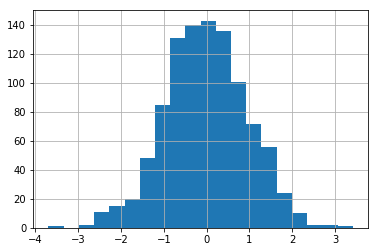

In [271]:
# Pandas uses matplotlib to plot data
# We can use matplotlib plot functions with their params!
# Usually we take a column and then apply th eplotting function
df1['A'].hist(bins=20)

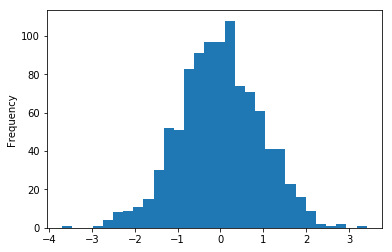

In [272]:
# General API for plots: plot
# kind: we specify which type of plot we want
# we pass typical arguments too
df1['A'].plot(kind='hist',bins=30)

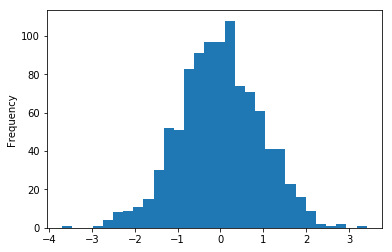

In [273]:
# We can also use plot.kind:
df1['A'].plot.hist(bins=30)

In [274]:
df2.head()

,a,b,c,d
0,0.039762,0.218517,0.103423,0.957904
1,0.937288,0.041567,0.899125,0.977680
2,0.780504,0.008948,0.557808,0.797510
3,0.672717,0.247870,0.264071,0.444358
4,0.053829,0.520124,0.552264,0.190008


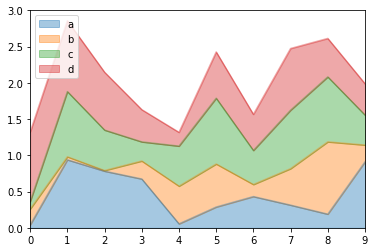

In [276]:
# Area plot
df2.plot.area(alpha=0.4)

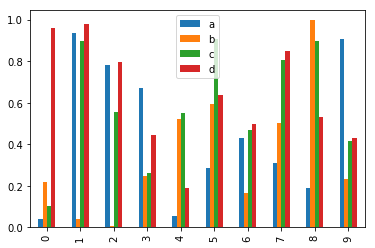

In [277]:
# Bar plot, stacked
df2.plot.bar()

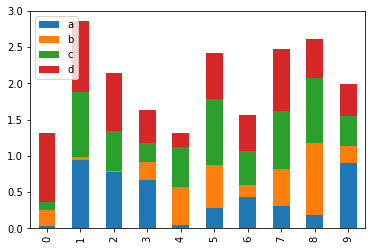

In [278]:
# Bar plot
df2.plot.bar(stacked=True)

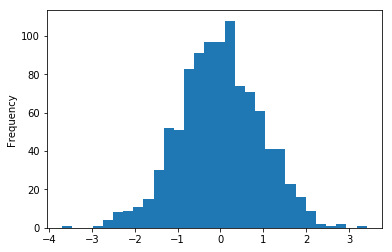

In [279]:
df1['A'].plot.hist(bins=30)

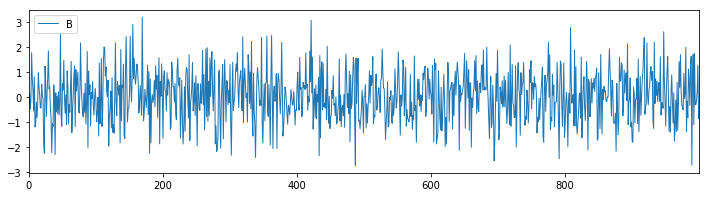

In [280]:
# Line plots
df1.plot.line(x=df1.index,y='B',figsize=(12,3),lw=1)

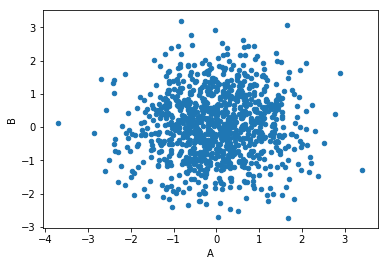

In [281]:
# Scatter plots
df1.plot.scatter(x='A',y='B')

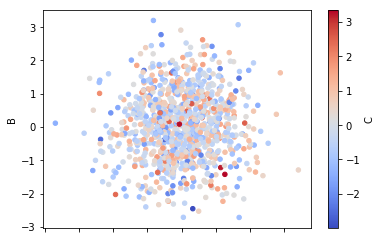

In [282]:
# We can specify the color to be function of a column!
df1.plot.scatter(x='A',y='B',c='C',cmap='coolwarm')

/Users/mxagar/anaconda3/lib/python3.6/site-packages/matplotlib/collections.py:836: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


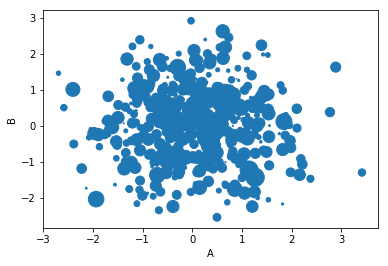

In [283]:
# We can specify the size to be function of a column!
# Now, we need to pass the df column
df1.plot.scatter(x='A',y='B',s=df1['C']*100)

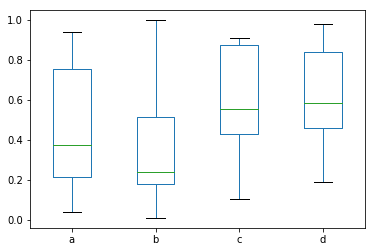

In [285]:
# Boxplots
df2.plot.box()

In [288]:
# Bi-variate plots
df = pd.DataFrame(np.random.randn(1000,2),columns=['a','b'])

In [287]:
df.head()

,a,b
0,0.041460,-0.411055
1,-0.771329,0.110477
2,-0.804652,0.253548
3,0.649148,0.358941
4,-1.080471,0.902398


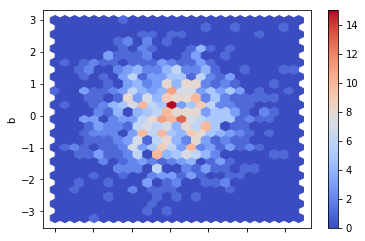

In [292]:
# Bi-variate plots: Hexplot
df.plot.hexbin(x='a',y='b',gridsize=25,cmap='coolwarm')

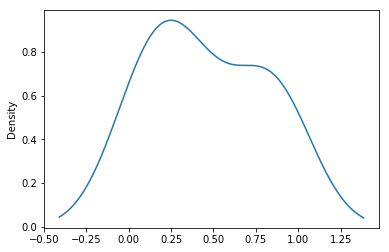

In [295]:
# Kernel density estimations = KDEs
df2['a'].plot.kde()

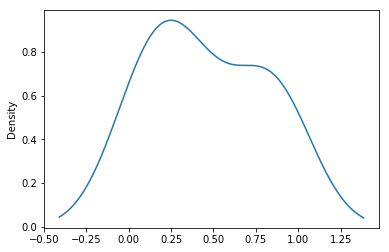

In [296]:
# The same as kde
df2['a'].plot.density()

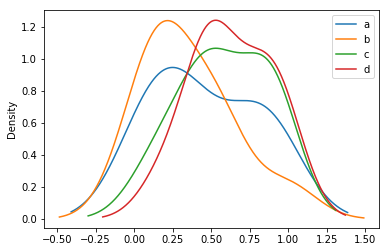

In [297]:
# We can plot kdes of several columns too
df2.plot.kde()

In [299]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

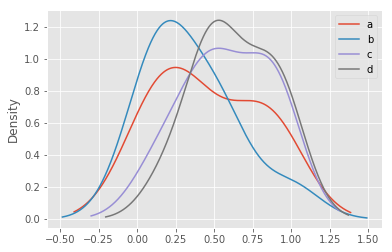

In [301]:
df2.plot.kde()